In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
df.duplicated().sum()

2

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Kms_Driven     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Seller_Type    299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [9]:
dfc= df.drop(['Car_Name','Fuel_Type', 'Seller_Type', 'Transmission'],axis=1)

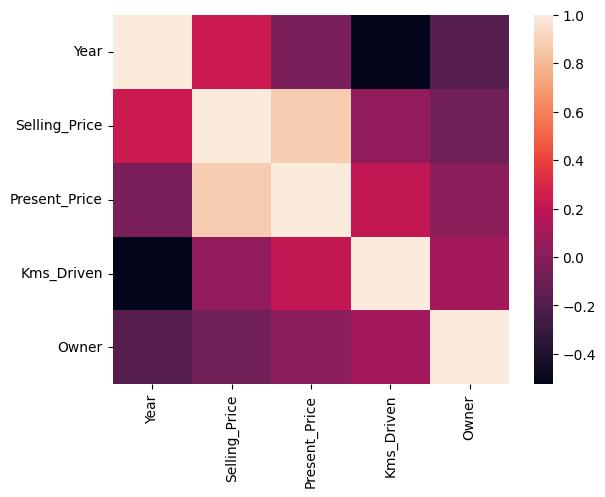

In [10]:
sns.heatmap(dfc.corr())
plt.show()

In [11]:
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        193
Individual    106
Name: count, dtype: int64
Transmission
Manual       260
Automatic     39
Name: count, dtype: int64


In [12]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace= True)
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace= True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace= True)

In [13]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


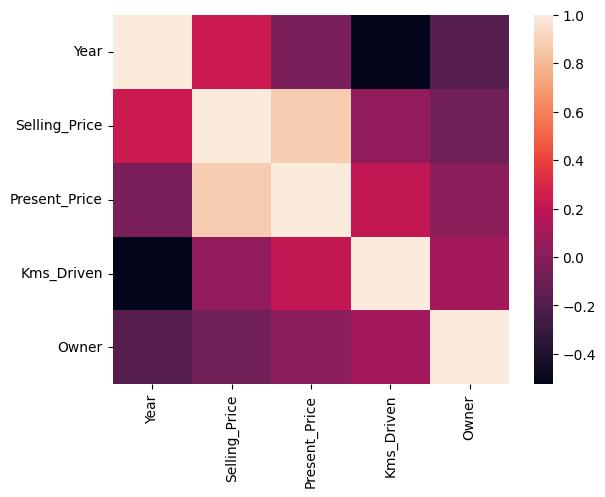

In [14]:
sns.heatmap(dfc.corr())
plt.show()

In [15]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [16]:
x = df[['Year', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

y=df['Selling_Price']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [19]:
x_train.shape

(269, 7)

In [20]:
y_test.shape

(30,)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr = LinearRegression()

In [23]:
lr.fit(x_train, y_train)

LinearRegression()

In [25]:
LinearRegression()

LinearRegression()

In [26]:
lrp = lr.predict(x_test)

In [27]:
from sklearn.metrics import r2_score

In [28]:
r2_score(lrp,y_test)

0.7741892885636855

In [29]:
from sklearn.linear_model import Lasso

In [30]:
las = Lasso()

In [31]:
las.fit(x_train,y_train)

Lasso()

In [32]:
lasp = las.predict(x_test)

In [33]:
r2_score(lasp,y_test)

0.7494108950986107

In [34]:
#'Year', 'Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'
mycar = [2018, 10.2, 130000, 1,1,0,0]

In [35]:
price = lr.predict([mycar])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [36]:
price

array([7.33437972])

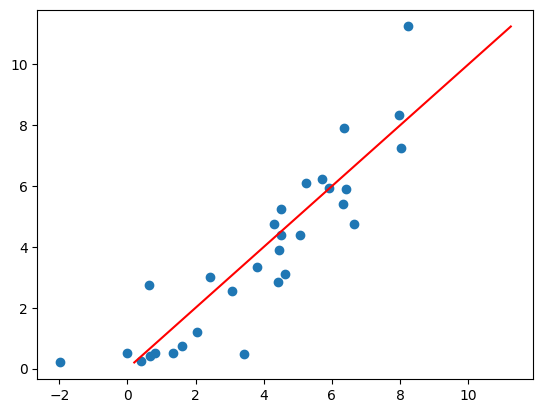

In [37]:
import matplotlib.pyplot as plt

plt.scatter(lrp, y_test)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color ='red')
plt.show()